Helpers:<br>
- [pandas.DataFrame.pivot](https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.DataFrame.pivot.html)

In [1]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    '''
    This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.abs
    - oecd_bli, gdp_per_capita: csv files.
    '''
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [2]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

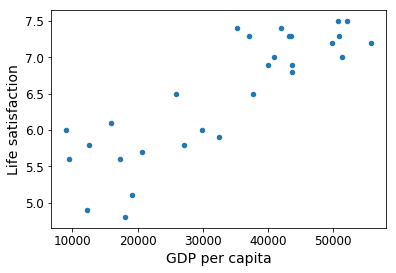

Predicted Life Satisfaction score by Linear model: 5.962423376619663
Predicted Life Satisfaction score by kNearestNeighbors model: 5.766666666666666


In [3]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# loading data
oecd_bli = pd.read_csv("./datasets/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("./datasets/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# selecting a linear model
model1 = LinearRegression()
model1.fit(X, Y)

model2 = KNeighborsRegressor(n_neighbors=3)
model2.fit(X, Y)

# making prediction for Cyprus
X_new = [[22587]]
print(f"Predicted Life Satisfaction score by Linear model: {model1.predict(X_new)[0][0]}")
print(f"Predicted Life Satisfaction score by kNearestNeighbors model: {model2.predict(X_new)[0][0]}")
